# Recitation 8: Optimization 

In [ ]:
using Plots
using LinearAlgebra
using Symbolics
using SymbolicUtils

In [ ]:
f(x) = 2*x^5+4*x^2+9*x

In [ ]:
x = -3:0.5:3
plot(x,f.(x))

## Gradients
### Analytical 

In [ ]:
@variables z
sym_f = 2*z^5+4*z^2+9*z

In [ ]:
sym_grad = Symbolics.gradient(sym_f,[z])

In [ ]:
substitute.(sym_grad, (Dict(z => 1.0),))

### Numerical 

In [ ]:
function getdiff(f,x0,h,diff_type)
    if(diff_type == 's')
        return (f(x0+h)-f(x0-h))/(2*h)
    elseif (diff_type == 'f')
        return (f(x0+h)-f(x0))/h
    else
        return (f(x0)-f(x0-h))/h 
    end
end


In [ ]:
x0 = 1;
h = 1;
@show m = getdiff(f,x0,h,'s')
y0 = f(x0)
plot(x,f.(x), linewidth = 2, color = :blue)
plot!([x0-h;x0+h], [f(x0)+m*(-h); f(x0)+m*h], linewidth = 2, color = :black, legend = false)
scatter!([x0],[y0], markersize = 5, color = :red, legend = false)

In [ ]:
@show m = getdiff(f,x0,h,'f')
plot(x,f.(x), linewidth = 2, color = :blue)
plot!([x0;x0+h], [f(x0); f(x0)+m*h], linewidth = 2, color = :black, legend = false)
scatter!([x0],[y0], markersize = 5, color = :red, legend = false)

In [ ]:
@show m = getdiff(f,x0,h,'b')
plot(x,f.(x), linewidth = 2, color = :blue)
plot!([x0-h;x0], [f(x0)+m*(-h); f(x0)], linewidth = 2, color = :black, legend = false)
scatter!([x0],[y0], markersize = 5, color = :red, legend = false)

## Gradient Descent 

In [ ]:
F(x) = (10*x[1]^2+x[2]^2)/2 + 5*log(1+exp(-x[1]-x[2]));
x0 = [10;10];
F(x0)

In [ ]:
x = -10:10
y = -10:10
f(x,y) = (10*x^2+y^2)/2 + 5*log(1+exp(-x-y));
contour( x, y, f, nlevels=100, width=2, size=[800,480], legend = :bottomleft )


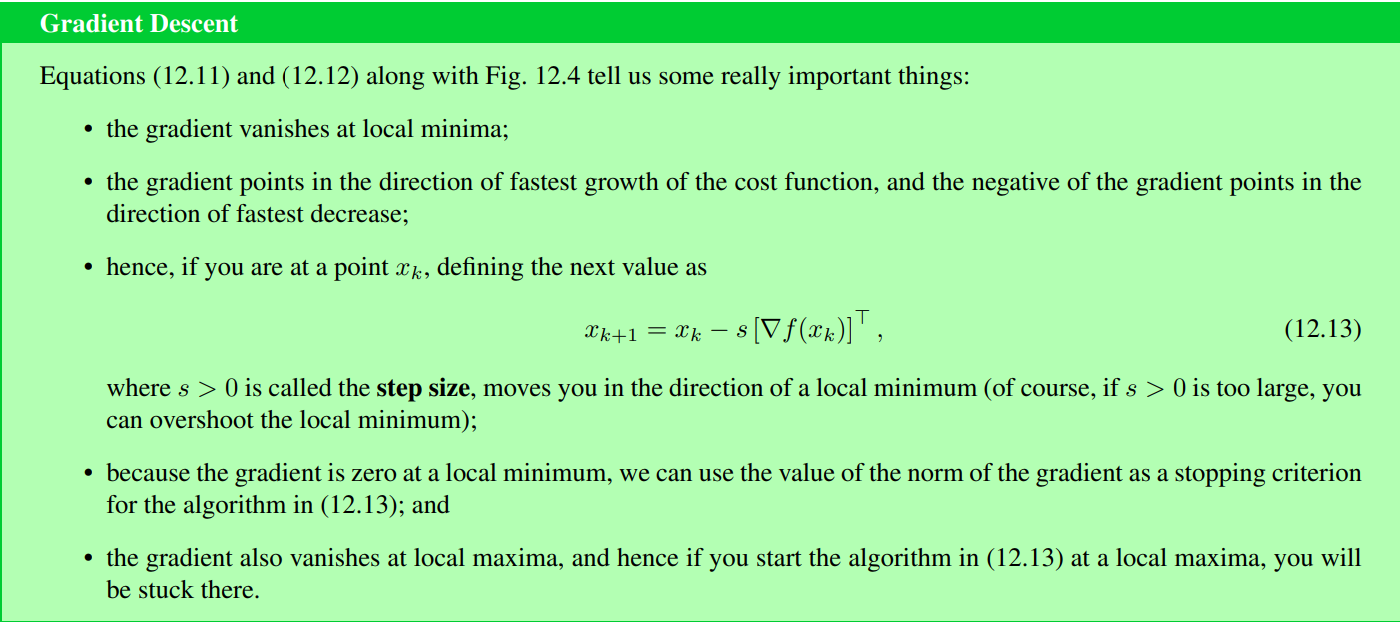

In [ ]:

function calc_grad(f, x0)
    n = length(x0);
    gradient = zeros(1,n);
    h = 0.01;
    my_Id = I+zeros(n,n)
    for i = 1:n
        gradient[1,i] = (f(x0+h*my_Id[:,i])-f(x0-h*my_Id[:,i]))/(2*h);
    end
    return gradient
end

calc_grad(F,x0)

In [ ]:
s = 0.01;
grad = calc_grad(F,x0)
xk = x0;
iter = 1;
plot_x = x0;
while(norm(grad)>1E-5 && iter < 10000)
    xk = xk - s*grad';
    grad = calc_grad(F,xk);
    iter = iter+1;
    plot_x = [plot_x xk]
end
@show iter 
scatter!(plot_x[1,:], plot_x[2,:], color = :black, label = "Gradient Descent");
plot!(plot_x[1,:], plot_x[2,:], color = :black, label = "")

In [ ]:
F(xk)

In [ ]:
xk

## Newtons Method

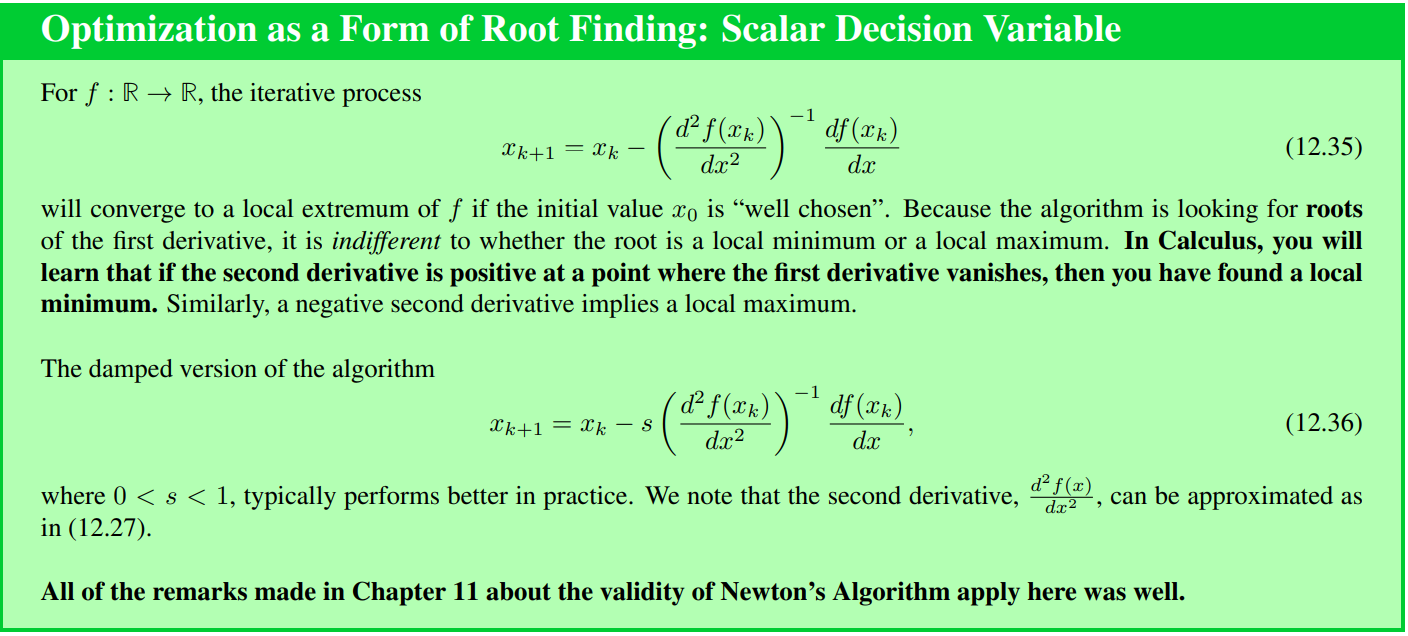

In [ ]:
function gradHess(f,x0) 
    n=size(x0,1)
    H=zeros(n,n)
    grad1=zeros(1,n)
    Id=diagm(0=>fill(1., size(H,1)))
    delta= 0.01
    h=delta
    for i=1:n
        grad1[i]=(f(x0+ h*Id[:,i]) -f(x0 -  h*Id[:,i]))[1]/(2*h)
        for j=1:n
            H[i,j]=(f(x0+ h*Id[:,i] + delta*Id[:,j])-  f(x0+  h*Id[:,i]-delta*Id[:,j]) - f(x0-  h*Id[:,i] + delta*Id[:,j])+ f(x0- h*Id[:,i]-delta*Id[:,j]))[1]/(4*h*delta)
        end
    end
    return  grad1, H
end
grad, H = gradHess(F,x0)
@show grad

In [ ]:
grad, H = gradHess(F,x0)
xk = x0;
s = 0.5;
iter = 1;
plot_x = x0;
while(norm(grad)>1E-5 && iter <10000)
    xk = xk - s*inv(H)*grad';
    grad,H = gradHess(F,xk);
    iter = iter +1;
    plot_x = [plot_x xk];
end
@show iter
scatter!(plot_x[1,:], plot_x[2,:], color = :blue, label = "Newtons Method");
plot!(plot_x[1,:], plot_x[2,:], color = :blue, label = "")

In [ ]:
F(xk)

In [ ]:
xk

## Example from Chapter 8, Linear Regression


In [ ]:

X=[1  2  4  5  7]'
Y=[4  8  10  12  18]'
Phi=[X ones(5,1)]
scatter(X,Y)
@show alphaStar = inv(Phi'*Phi)*Phi'*Y
y_hat = Phi*alphaStar;
plot!(X, y_hat)

In [ ]:
F(alphaStar) = norm(Phi*alphaStar-Y)^2
f(m,b) = norm(Phi*[m;b]-Y)^2

m = 0:0.1:4;
b = -10:10;

contour(m,b,f, nlevels=100, width=2, size=[800,480], legend = :bottomleft )

In [ ]:
x0 = [3;10];

In [ ]:
s = 0.001;
grad = calc_grad(F,x0)
xk = x0;
iter = 1;
plot_x = x0;
while(norm(grad)>1E-5 && iter < 10000)
    xk = xk - s*grad';
    grad = calc_grad(F,xk);
    iter = iter+1;
    plot_x = [plot_x xk]
end
@show iter 
scatter!(plot_x[1,:], plot_x[2,:], color = :black, label = "Gradient Descent");
plot!(plot_x[1,:], plot_x[2,:], color = :black, label = "")

In [ ]:
xk
isapprox(xk, alphaStar, atol = 0.001)

In [ ]:
F(xk)

In [ ]:
grad, H = gradHess(F,x0)
xk = x0;
s = 0.5;
iter = 1;
plot_x = x0;
while(norm(grad)>1E-5 && iter <10000)
    xk = xk - s*inv(H)*grad';
    grad,H = gradHess(F,xk);
    iter = iter +1;
    plot_x = [plot_x xk];
end
@show iter
scatter!(plot_x[1,:], plot_x[2,:], color = :blue, label = "Newtons Method");
plot!(plot_x[1,:], plot_x[2,:], color = :blue, label = "")

In [ ]:
xk
isapprox(xk, alphaStar, atol = 0.001)

In [ ]:
f(x) = x[2]*sin(x[1]) + x[1]x[2];
x = [pi/2;-1.0];
Hess = zeros(2,2)
Id = [1 0; 0 1];
h = 0.1;
delta = 0.1;
for i = 1:2, j = 1:2
    Hess[i,j] = (f(x+h*Id[:,i]+delta*Id[:,j])-f(x+h*Id[:,i]-delta*Id[:,j]) - f(x-h*Id[:,i]+delta*Id[:,j]) + f(x-h*Id[:,i]-delta*Id[:,j]))/(4*delta*h);
end
@show Hess